In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D  # convolution Layer
from keras.layers import MaxPooling2D   # Pooling Layer
from keras.layers import Flatten        # Flatten
from keras.layers import Dense          # Hidden Layer & Output Layer

import warnings 
warnings.filterwarnings("ignore")

In [4]:
# Initialising the CNN
classifier = Sequential()

################### CNN - 1 ###################
# Step 1 - Convolution Layer
classifier.add(Convolution2D(32, (3, 3) , input_shape = (64, 64, 3), activation = 'relu')) # entire image

# Step 2 - Pooling Layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))

################### CNN - 2 ###################
             
classifier.add(Convolution2D(32, (3, 3) , activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))


#################### Flattening Layer ################### 
classifier.add(Flatten())

#################### Step 4 - Full connection  ( Neural Netwokr) ###################
classifier.add(Dense(units = 128, activation = 'relu'))   ## 1 HIDDEN LAYER WITH 128 NEURONS 
classifier.add(Dense(units = training_set.num_classes , activation = 'softmax'))  ## OUTPUT LAYER WITH NUM_CLASSES NEURONS # softmax for multi-class classification

In [5]:
# Compiling the CNN
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
classifier.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │         802,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 813,346 (3.10 MB)

 Trainable params: 813,346 (3.10 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Part 2 - Fitting the CNN to the images
import tensorflow as tf

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)  # max normilization
                                   

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(r"C:\Users\naveen kumar pandey\Desktop\DATA ANALYTICS\PYTHON\ML and Dl\CNN DATASET\archive\train",
                                                 target_size = (64, 64),  # HEIGHT AND WIDTH
                                                 batch_size = 34, # take 32 group which pick image randomly without replacement
                                                 class_mode = 'categorical') # categorical because we have many food types

test_set = test_datagen.flow_from_directory(r"C:\Users\naveen kumar pandey\Desktop\DATA ANALYTICS\PYTHON\ML and Dl\CNN DATASET\archive\test",
                                            target_size = (64, 64),
                                            batch_size = 34,
                                            class_mode = 'categorical')


Found 1275 images belonging to 2 classes.
Found 182 images belonging to 2 classes.


In [9]:
for data_batch, labels_batch in training_set:
    print('train data batch shape:', data_batch.shape)
    print('train labels batch shape:', labels_batch.shape)
    break

for data_batch, labels_batch in test_set:
    print('test data batch shape:', data_batch.shape)
    print('test labels batch shape:', labels_batch.shape)
    break

train data batch shape: (34, 64, 64, 3)
train labels batch shape: (34, 2)
test data batch shape: (34, 64, 64, 3)
test labels batch shape: (34, 2)


In [10]:
result = classifier.fit(training_set,
                         epochs=10, # iteration or repeat 
                         validation_data = test_set)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 21s 468ms/step - accuracy: 0.5619 - loss: 0.7061 - val_accuracy: 0.7143 - val_loss: 0.5783
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.6919 - loss: 0.5985 - val_accuracy: 0.7418 - val_loss: 0.5050
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7559 - loss: 0.5154 - val_accuracy: 0.7692 - val_loss: 0.4760
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8129 - loss: 0.4267 - val_accuracy: 0.8022 - val_loss: 0.4594
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8447 - loss: 0.3673 - val_accuracy: 0.7582 - val_loss: 0.5402
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8464 - loss: 0.3510 - val_accuracy: 0.8132 - val_loss: 0.4348
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8903 - loss: 0.2596 - val_accuracy: 0.8242 - val_loss: 0.4378
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9268 - loss: 0.1935 - val_accuracy: 0.8187 -

In [11]:
classifier.save('Daisy_Dandelion_Classifier.h5')

In [12]:
from keras.models import load_model
from keras_preprocessing import image
import numpy as np
import cv2   #pip install opencv-python
import matplotlib.pyplot as plt 
%matplotlib inline

In [16]:
# !pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/ec/6c/fab8113424af5049f85717e8e527ca3773299a3c6b02506e66436e19874f/opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB 435.7 kB/s eta 0:01:30
   ---------------------------------------- 0.1/38.8 MB 656.4 kB/s eta 0:01:00
   ---------------------------------------- 0.2/38.8 MB 1.1 MB/s eta 0:00:34
   ---------------------------------------- 0.2/38.8 MB 1.1 MB/s eta 0:00:35
   ---------------------------------------- 0.3/38.8 MB 1.5 MB/s eta 0:00:26
   ---------------------------------------- 0.4/38.8 MB 1.7 MB/s eta 0:00:24
    --------------------------------------- 0.5/38.8 MB 1.8 MB/s eta 0:00:22
    -------------

In [14]:
reload_model = load_model("Daisy_Dandelion_Classifier.h5")

In [15]:
def model_output(path):
    raw_img = image.load_img(path, target_size=(64, 64))  # importing image is converted to 64*64
    raw_img = image.img_to_array(raw_img)  # convert image to array 
    raw_img = np.expand_dims(raw_img, axis=0)
    raw_img = raw_img / 255  # data max normalization
    probabilities = reload_model.predict(raw_img)[0]  # get probabilities for each class
    predicted_class = np.argmax(probabilities)  # get the index of the highest probability
    class_labels = list(training_set.class_indices.keys())  # get class labels from training set
    predicted_label = class_labels[predicted_class]  # get the label of the predicted class
    plt.imshow(cv2.imread(path))  # Display Image
    plt.title(f'Predicted: {predicted_label}, Probability: {probabilities[predicted_class]:.2f}')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


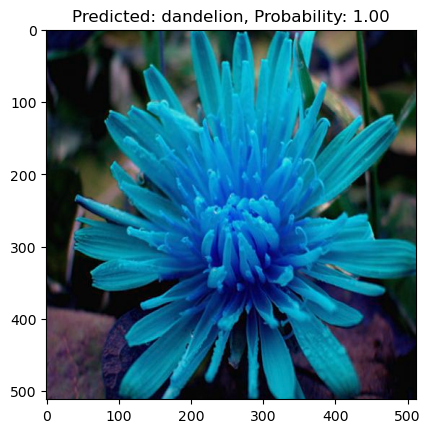

In [17]:
model_output(r"C:\Users\naveen kumar pandey\Desktop\DATA ANALYTICS\PYTHON\ML and Dl\CNN DATASET\archive\valid\dandelion\340190928_d77bf4d615_jpg.rf.4c536b71ac733083357539a318b8d875.jpg")

In [ ]:
# Performance on 50 Random Images from Trained Data Set

In [21]:
import os
import numpy as np
import random
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score

# Function to load and preprocess a single image
def load_and_preprocess_image(img_path, target_size=(64, 64)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Rescale the image
    return img_array

# Get list of all files in the test directory
train_files = []
for root, dirs, files in os.walk(r"C:\Users\naveen kumar pandey\Desktop\DATA ANALYTICS\PYTHON\ML and Dl\CNN DATASET\archive\train\dandelion"):
    for file in files:
        if file.endswith(('.jpeg', '.jpg', '.png')):
            train_files.append(os.path.join(root, file))

# Randomly select 50 images
random_files = random.sample(train_files, 50)

# Get true labels and predicted labels
true_labels = []
predicted_labels = []

for file in random_files:
    # Get true label from the directory structure
    true_label = os.path.basename(os.path.dirname(file))
    true_labels.append(true_label)
    
    # Preprocess the image
    img_array = load_and_preprocess_image(file)
    
    # Predict the label
    prediction = classifier.predict(img_array)
    predicted_label_index = np.argmax(prediction)
    
    # Find the class label corresponding to the predicted index
    predicted_label = list(training_set.class_indices.keys())[list(training_set.class_indices.values()).index(predicted_label_index)]
    predicted_labels.append(predicted_label)

# Convert true labels to indices
true_labels_indices = [training_set.class_indices[label] for label in true_labels]

# Convert predicted labels to indices
predicted_labels_indices = [training_set.class_indices[label] for label in predicted_labels]

# Calculate accuracy
accuracy = accuracy_score(true_labels_indices, predicted_labels_indices)
print(f"Accuracy on 50 random trained images: {accuracy * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━

In [ ]:
# Performance on 50 Random Images from Test Data Set

In [22]:
# Get list of all files in the test directory
test_files = []
for root, dirs, files in os.walk(r"C:\Users\naveen kumar pandey\Desktop\DATA ANALYTICS\PYTHON\ML and Dl\CNN DATASET\archive\test\daisy"):
    for file in files:
        if file.endswith(('.jpeg', '.jpg', '.png')):
            test_files.append(os.path.join(root, file))

# Randomly select 50 images
random_files = random.sample(test_files, 50)

# Get true labels and predicted labels
true_labels = []
predicted_labels = []

for file in random_files:
    # Get true label from the directory structure
    true_label = os.path.basename(os.path.dirname(file))
    true_labels.append(true_label)
    
    # Preprocess the image
    img_array = load_and_preprocess_image(file)
    
    # Predict the label
    prediction = classifier.predict(img_array)
    predicted_label_index = np.argmax(prediction)
    
    # Find the class label corresponding to the predicted index
    predicted_label = list(training_set.class_indices.keys())[list(training_set.class_indices.values()).index(predicted_label_index)]
    predicted_labels.append(predicted_label)

# Convert true labels to indices
true_labels_indices = [training_set.class_indices[label] for label in true_labels]

# Convert predicted labels to indices
predicted_labels_indices = [training_set.class_indices[label] for label in predicted_labels]

# Calculate accuracy
accuracy = accuracy_score(true_labels_indices, predicted_labels_indices)
print(f"Accuracy on 50 random test images: {accuracy * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━

# Finish